In [ ]:
pip install -U cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.1 MB/s eta 0:00:00
  Created wheel 

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


            assay        cell_type                          tissue  \
0       10x 5' v1           neuron                            lung   
1       10x 5' v1           neuron                            lung   
2       10x 5' v1           neuron                            lung   
3       10x 5' v1           neuron                            lung   
4       10x 5' v1           neuron                            lung   
...           ...              ...                             ...   
732776  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732777  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732778  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732779  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732780  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   

       tissue_general suspension_type   disease     sex  
0                lung            cell    normal  female  
1                lung            cell    no

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma() as census:
    adata = cellxgene_census.get_anndata(
        census = census,
        organism = "Homo sapiens",
        var_value_filter = "feature_id in ['ENSG00000161798', 'ENSG00000188229']",
        obs_value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = {"obs": ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]},
    )

    print(adata)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
<ipython-input-3-31ea77b51fb3>:4: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


AnnData object with n_obs × n_vars = 732781 × 2
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'


In [ ]:
import cellxgene_census
import tiledbsoma

with cellxgene_census.open_soma() as census:

    human = census["census_data"]["homo_sapiens"]
    query = human.axis_query(
       measurement_name = "RNA",
       obs_query = tiledbsoma.AxisQuery(
           value_filter = "tissue == 'brain' and sex == 'male'"
       )
    )
    iterator = query.X("raw").tables()

    # Get an iterative slice as pyarrow.Table
    raw_slice = next (iterator)
    query.close()

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


In [1]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=fde20ba86cb97c73a525c82ba9da500d45175ecc094da6e000565aaaae125a55
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeatur

In [3]:
# Check if genes_of_interest are in the var.index
print("Available genes:", adata.var.index.tolist())
print("Genes of interest:", genes_of_interest)

Available genes: ['ENSG00000278915', 'ENSG00000168454', 'ENSG00000139180', 'ENSG00000229177', 'ENSG00000204564', 'ENSG00000116717', 'ENSG00000254418', 'ENSG00000114654', 'ENSG00000257894', 'ENSG00000198398', 'ENSG00000085117', 'ENSG00000092140', 'ENSG00000257008', 'ENSG00000125877', 'ENSG00000170430', 'ENSG00000231662', 'ENSG00000140853', 'ENSG00000261198', 'ENSG00000185610', 'ENSG00000171475', 'ENSG00000180332', 'ENSG00000174982', 'ENSG00000128052', 'ENSG00000272564', 'ENSG00000270000', 'ENSG00000267683', 'ENSG00000151849', 'ENSG00000257335', 'ENSG00000178279', 'ENSG00000251665', 'ENSG00000263438', 'ENSG00000171448', 'ENSG00000164253', 'ENSG00000285210', 'ENSG00000072657', 'ENSG00000131242', 'ENSG00000130675', 'ENSG00000238113', 'ENSG00000140522', 'ENSG00000270885', 'ENSG00000197013', 'ENSG00000249776', 'ENSG00000250361', 'ENSG00000204161', 'ENSG00000162745', 'ENSG00000215203', 'ENSG00000102225', 'ENSG00000256250', 'ENSG00000247121', 'ENSG00000163104', 'ENSG00000089693', 'ENSG00000282

In [4]:
# Filter the AnnData object for these genes
adata_filtered = adata[:, adata.var_names.isin(genes_of_interest)]

# Print the filtered AnnData object
print(adata_filtered)

View of AnnData object with n_obs × n_vars = 23197 × 0
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [6]:
pip install scanpy

In [9]:
import scanpy as sc

# Load the downloaded dataset into an AnnData object
adata = sc.read_h5ad('inhibitory_dataset.h5ad')

# Print a summary of the data
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [10]:
# Explore data - Check the number of cells and genes
print(f'Number of cells: {adata.n_obs}')
print(f'Number of genes: {adata.n_vars}')

# Print the names of the genes (if available)
print(adata.var_names)

Number of cells: 23197
Number of genes: 33091
Index(['ENSG00000278915', 'ENSG00000168454', 'ENSG00000139180',
       'ENSG00000229177', 'ENSG00000204564', 'ENSG00000116717',
       'ENSG00000254418', 'ENSG00000114654', 'ENSG00000257894',
       'ENSG00000198398',
       ...
       'ENSG00000121940', 'ENSG00000261555', 'ENSG00000204516',
       'ENSG00000175147', 'ENSG00000267772', 'ENSG00000160799',
       'ENSG00000272264', 'ENSG00000175792', 'ENSG00000066084',
       'ENSG00000119203'],
      dtype='object', length=33091)


In [11]:
# List of specific genes I want to keep and focus
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "RP11-701H24.9",
    "LINGO1",
    "PDE4DIP",
    "AC159540.1",
    "RP11-289H16.1",
    "RP11-219A15.1",
    "LINC01609",
    "PHYHIP",
    "RP11-745L13.2"
]
# Filter the AnnData object for these genes
adata_filtered = adata[:, adata.var_names.isin(genes_of_interest)]

# Print the filtered AnnData object summary
print(adata_filtered)

View of AnnData object with n_obs × n_vars = 23197 × 0
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [13]:
import pandas as pd
import urllib.request
import scanpy as sc

# Step 1: Download and load the CSV containing gene names (if needed)
url_genes = "https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv"
urllib.request.urlretrieve(url_genes, "differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv", comment="#")

# Display the first few rows of the gene DataFrame
print(genes.head())

# Step 2: Load the AnnData object
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'inhibitory_dataset.h5ad')
adata = sc.read_h5ad('inhibitory_dataset.h5ad')


            Gene  Log Fold Change  Effect Size  Adjusted P-Value
0        SLC26A3            1.246        3.958               0.0
1       RASGEF1B            2.178        3.855               0.0
2  RP11-701H24.9            1.044        3.396               0.0
3         LINGO1            1.797        2.873               0.0
4        PDE4DIP            1.276        2.671               0.0


In [14]:
# Step 3: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "RP11-701H24.9",
    "LINGO1",
    "PDE4DIP",
    "AC159540.1",
    "RP11-289H16.1",
    "RP11-219A15.1",
    "LINC01609",
    "PHYHIP",
    "RP11-745L13.2"
]

# Step 4: Filter the AnnData object for the genes of interest
# Check if the genes are in the AnnData object
print("Available genes:", adata.var_names.tolist())
filtered_genes = [gene for gene in genes_of_interest if gene in adata.var_names]

# Filter the AnnData object
adata_filtered = adata[:, adata.var_names.isin(filtered_genes)]

# Print the filtered AnnData object summary
print(adata_filtered)

Available genes: ['ENSG00000278915', 'ENSG00000168454', 'ENSG00000139180', 'ENSG00000229177', 'ENSG00000204564', 'ENSG00000116717', 'ENSG00000254418', 'ENSG00000114654', 'ENSG00000257894', 'ENSG00000198398', 'ENSG00000085117', 'ENSG00000092140', 'ENSG00000257008', 'ENSG00000125877', 'ENSG00000170430', 'ENSG00000231662', 'ENSG00000140853', 'ENSG00000261198', 'ENSG00000185610', 'ENSG00000171475', 'ENSG00000180332', 'ENSG00000174982', 'ENSG00000128052', 'ENSG00000272564', 'ENSG00000270000', 'ENSG00000267683', 'ENSG00000151849', 'ENSG00000257335', 'ENSG00000178279', 'ENSG00000251665', 'ENSG00000263438', 'ENSG00000171448', 'ENSG00000164253', 'ENSG00000285210', 'ENSG00000072657', 'ENSG00000131242', 'ENSG00000130675', 'ENSG00000238113', 'ENSG00000140522', 'ENSG00000270885', 'ENSG00000197013', 'ENSG00000249776', 'ENSG00000250361', 'ENSG00000204161', 'ENSG00000162745', 'ENSG00000215203', 'ENSG00000102225', 'ENSG00000256250', 'ENSG00000247121', 'ENSG00000163104', 'ENSG00000089693', 'ENSG00000282

In [18]:
print(adata.var.columns)


Index(['feature_is_filtered', 'feature_name', 'feature_reference',
       'feature_biotype', 'feature_length', 'feature_type'],
      dtype='object')


In [19]:
import pandas as pd

# Step 3: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "RP11-701H24.9",
    "LINGO1",
    "PDE4DIP",
    "AC159540.1",
    "RP11-289H16.1",
    "RP11-219A15.1",
    "LINC01609",
    "PHYHIP",
    "RP11-745L13.2"
]

# Create a mapping of feature names to Ensembl IDs from the AnnData object
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']      # This contains the gene name
    ensembl_id = row['feature_reference']  # This likely contains the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 4: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print results
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

Matched Genes (gene name: ID name):
SLC26A3: NCBITaxon:9606
RASGEF1B: NCBITaxon:9606
LINGO1: NCBITaxon:9606
PDE4DIP: NCBITaxon:9606
LINC01609: NCBITaxon:9606
PHYHIP: NCBITaxon:9606

Unmatched Genes:
RP11-701H24.9
AC159540.1
RP11-289H16.1
RP11-219A15.1
RP11-745L13.2


In [20]:
print(adata.var.columns.tolist())

['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [21]:
print(adata.var.head())

                 feature_is_filtered       feature_name feature_reference  \
ENSG00000278915                False  ENSG00000278915.1    NCBITaxon:9606   
ENSG00000168454                False             TXNDC2    NCBITaxon:9606   
ENSG00000139180                False             NDUFA9    NCBITaxon:9606   
ENSG00000229177                False  ENSG00000229177.1    NCBITaxon:9606   
ENSG00000204564                False           C6orf136    NCBITaxon:9606   

                feature_biotype feature_length    feature_type  
ENSG00000278915            gene            577          lncRNA  
ENSG00000168454            gene           1703  protein_coding  
ENSG00000139180            gene            782  protein_coding  
ENSG00000229177            gene            327          lncRNA  
ENSG00000204564            gene            653  protein_coding  


In [22]:
import pandas as pd

# Step 3: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "RP11-701H24.9",
    "LINGO1",
    "PDE4DIP",
    "AC159540.1",
    "RP11-289H16.1",
    "RP11-219A15.1",
    "LINC01609",
    "PHYHIP",
    "RP11-745L13.2"
]

# Create a mapping of feature names to Ensembl IDs using the index
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 4: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print results
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783
PDE4DIP: ENSG00000178104
LINC01609: ENSG00000253103
PHYHIP: ENSG00000168490

Unmatched Genes:
RP11-701H24.9
AC159540.1
RP11-289H16.1
RP11-219A15.1
RP11-745L13.2


In [ ]:
import pandas as pd
import urllib.request
import scanpy as sc

# Step 1: Download and load the CSV containing gene names (if needed)
url_genes = "https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv"
urllib.request.urlretrieve(url_genes, "differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv", comment="#")

# Display the first few rows of the gene DataFrame
print(genes.head())

# Step 2: Load the AnnData object
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'inhibitory_dataset.h5ad')
adata = sc.read_h5ad('inhibitory_dataset.h5ad')


In [3]:
pip install -U cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 854.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.1 MB/s eta 0:00:00
  Created wheel 

In [4]:
import pandas as pd
import urllib.request
import scanpy as sc

# Step 1: Download and load the CSV containing gene names (if needed)
url_genes = "https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv"
urllib.request.urlretrieve(url_genes, "differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv", comment="#")

# Display the first few rows of the gene DataFrame
print(genes.head())

# Step 2: Load the AnnData object
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'inhibitory_dataset.h5ad')
adata = sc.read_h5ad('inhibitory_dataset.h5ad')

            Gene  Log Fold Change  Effect Size  Adjusted P-Value
0        SLC26A3            1.246        3.958               0.0
1       RASGEF1B            2.178        3.855               0.0
2  RP11-701H24.9            1.044        3.396               0.0
3         LINGO1            1.797        2.873               0.0
4        PDE4DIP            1.276        2.671               0.0


In [8]:
print("Columns in adata.obs:", adata.obs.columns)

Columns in adata.obs: Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age',
       'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon',
       'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id',
       'assay_ontology_term_id', 'disease_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'donor_id',
       'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Check for cohort information
print("Cohort Information in adata.obs:", adata.obs['disease'].unique())

Cohort Information in adata.obs: ['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the specific genes of interest
genes_of_interest = [
    "SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP",
    "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609",
    "PHYHIP", "RP11-745L13.2"
]

# Filter `adata` to include only the genes of interest that are present in `adata.var_names`
filtered_genes = [gene for gene in genes_of_interest if gene in adata.var_names]
adata_filtered = adata[:, adata.var_names.isin(filtered_genes)]

print("Filtered AnnData object with genes of interest:")
print(adata_filtered)
# Step 1: Filter data for Alzheimer's and normal subjects
alz_data = adata_filtered[adata.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata.obs['disease'] == 'normal']

# Step 2: Perform differential expression analysis on the genes of interest
p_values = {}
for gene in filtered_genes:
    # Extract expression values for each group
    alz_expression = alz_data[:, gene].X.toarray().flatten()
    normal_expression = normal_data[:, gene].X.toarray().flatten()

    # Conduct a t-test
    t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
    p_values[gene] = p_val

# Print p-values for each gene
print("\nDifferential expression results (p-values):")
for gene, p_val in p_values.items():
    print(f"{gene}: {p_val}")

# Step 3: Visualize significant genes
significant_genes = [gene for gene, p_val in p_values.items() if p_val < 0.05]
for gene in significant_genes:
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        x=adata.obs['disease'],
        y=adata[:, gene].X.toarray().flatten(),
        data=adata.obs,
        palette={"Alzheimer disease": "purple", "normal": "green"}
    )
    plt.title(f'Expression of {gene} in Alzheimer vs Normal')
    plt.ylabel('Expression Level')
    plt.show()

Filtered AnnData object with genes of interest:
View of AnnData object with n_obs × n_vars = 23197 × 0
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

Differential expression results (p-values):


            Gene  Log Fold Change  Effect Size  Adjusted P-Value
0        SLC26A3            1.246        3.958               0.0
1       RASGEF1B            2.178        3.855               0.0
2  RP11-701H24.9            1.044        3.396               0.0
3         LINGO1            1.797        2.873               0.0
4        PDE4DIP            1.276        2.671               0.0
Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783
PDE4DIP: ENSG00000178104
LINC01609: ENSG00000253103
PHYHIP: ENSG00000168490

Unmatched Genes:
RP11-701H24.9
AC159540.1
RP11-289H16.1
RP11-219A15.1
RP11-745L13.2
Filtered AnnData object with genes of interest (by Ensembl IDs):
View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


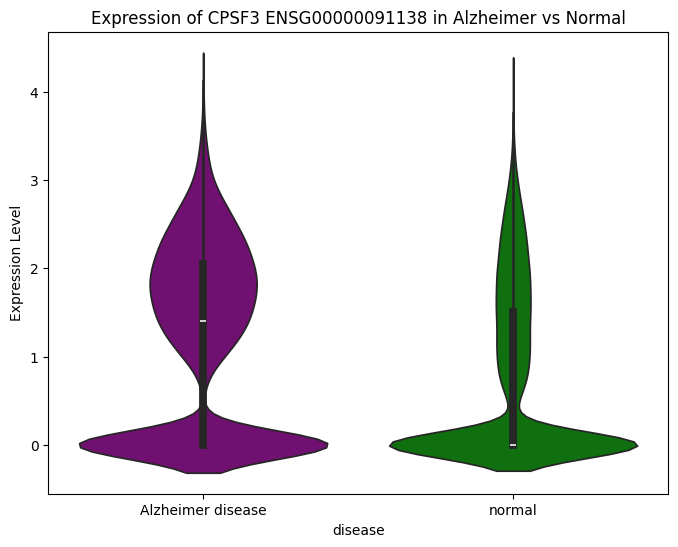

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


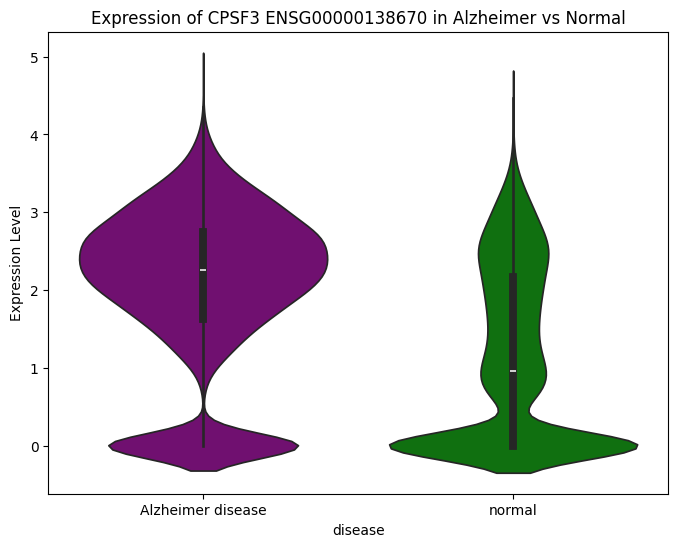

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


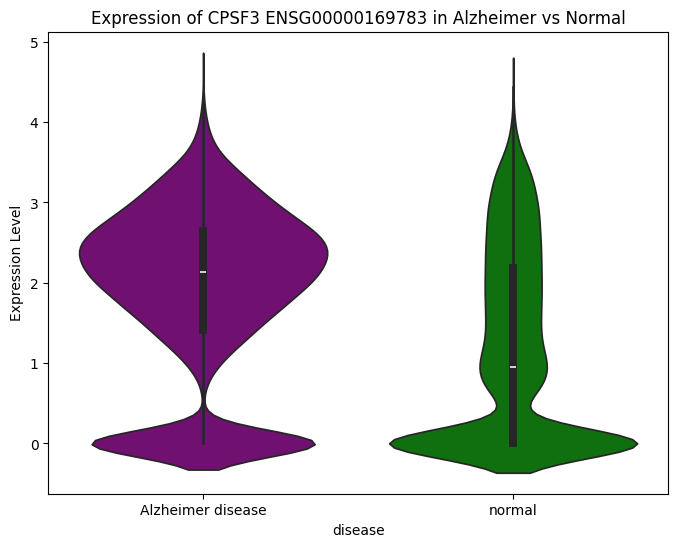

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


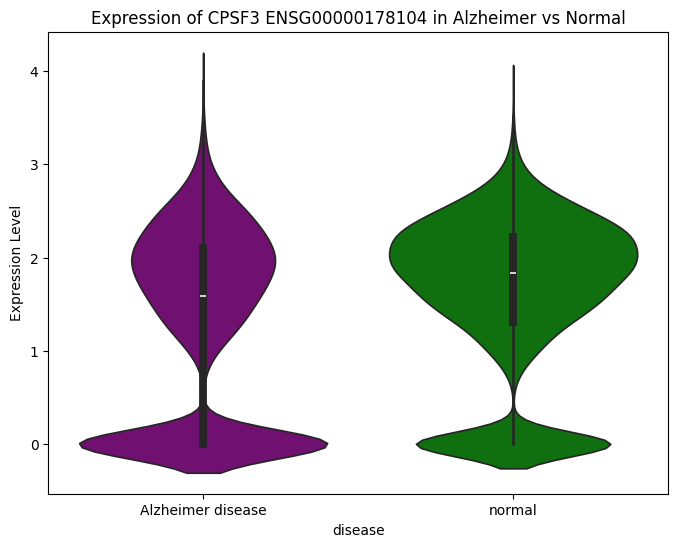

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


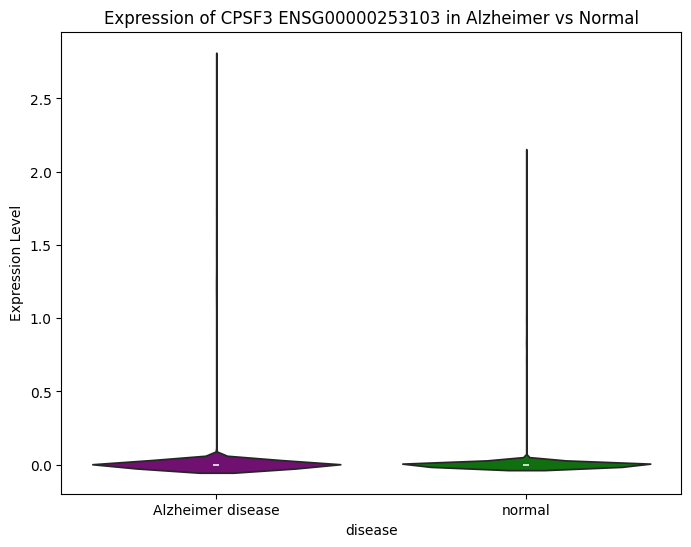

<ipython-input-34-aedef238316b>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


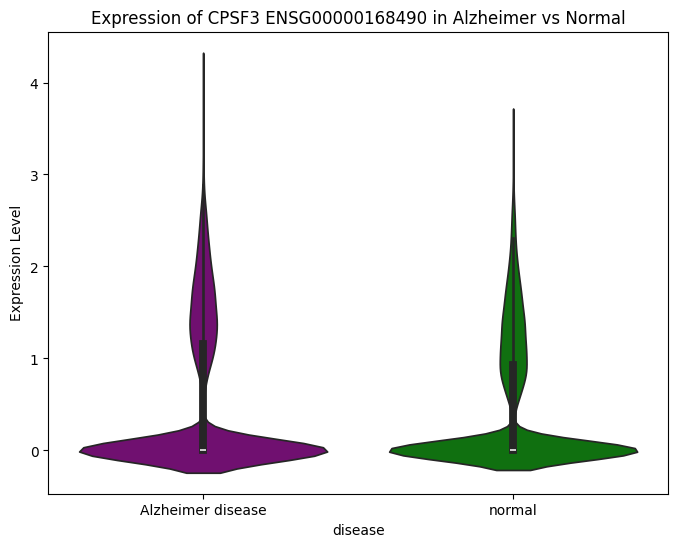

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scanpy as sc
import urllib.request

# Step 1: Download and load the CSV containing gene names (if needed)
url_genes = "https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv"
urllib.request.urlretrieve(url_genes, "differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv", comment="#")

# Display the first few rows of the gene DataFrame
print(genes.head())

# Step 2: Load the AnnData object
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'inhibitory_dataset.h5ad')
adata = sc.read_h5ad('inhibitory_dataset.h5ad')

# Step 3: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP",
    "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609",
    "PHYHIP", "RP11-745L13.2"
]

# Step 4: Create a mapping of feature names to Ensembl IDs using the index
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 5: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print matched and unmatched genes
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

# --------------------Step 6: Filter `adata` to include only matched Ensembl IDs----------
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Confirm the filtered AnnData object
print("Filtered AnnData object with genes of interest (by Ensembl IDs):")
print(adata_filtered)

# Step 7: Differential Expression Analysis for Alzheimer's vs Normal
# Check cohort information
print("Unique values in 'disease' column:", adata.obs['disease'].unique())

# Filter data for Alzheimer's and normal subjects
alz_data = adata_filtered[adata.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata.obs['disease'] == 'normal']

# Perform differential expression analysis on the genes of interest
p_values = {}
for gene_id in matched_ids:
    # Extract expression values for each group
    alz_expression = alz_data[:, gene_id].X.toarray().flatten()
    normal_expression = normal_data[:, gene_id].X.toarray().flatten()

    # Conduct a t-test
    t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
    p_values[gene_id] = p_val

# Print p-values for each gene
print("\nDifferential expression results (p-values):")
for gene_id, p_val in p_values.items():
    print(f"{gene_id}: {p_val}")

# Step 8: Visualize significant genes
# Plot expression levels for genes with significant differences (p-value < 0.05)
significant_genes = [gene_id for gene_id, p_val in p_values.items() if p_val < 0.05]
for gene_id in significant_genes:
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        x=adata.obs['disease'],
        y=adata[:, gene_id].X.toarray().flatten(),
        data=adata.obs,
        palette={"Alzheimer disease": "purple", "normal": "green"}
    )
    plt.title(f'Expression of {gene_name} {gene_id} in Alzheimer vs Normal')
    plt.ylabel('Expression Level')
    plt.show()

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("Columns in adata.obs:", adata.obs.columns)

# Step 2: Filter subjects based on age range (57 to 89) in the `age` column
adata_age_filtered = adata[adata.obs['age'].between(57, 89), :]

# Confirm the filtered dataset has the expected age range
print("Filtered AnnData object with age range 57-89:")
print(adata_age_filtered)

# Step 3: Choose genes of interest and prepare for plotting
# We will use the previously defined `matched_ids` to filter specific genes
adata_age_filtered_genes = adata_age_filtered[:, adata_age_filtered.var_names.isin(matched_ids)]

# Step 4: Create age group categories (e.g., 57-64, 65-72, 73-80, 81-89)
adata_age_filtered.obs['age_group'] = pd.cut(adata_age_filtered.obs['age'],
                                             bins=[56, 64, 72, 80, 89],
                                             labels=["57-64", "65-72", "73-80", "81-89"])

# Step 5: Visualize gene expression across different age groups for each gene of interest
for gene_id in matched_ids:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x='age_group',
        y=adata_age_filtered_genes[:, gene_id].X.toarray().flatten(),
        data=adata_age_filtered.obs,
        palette="coolwarm"
    )
    plt.title(f'Expression of {gene_id} Across Age Groups (57-89)')
    plt.xlabel('Age Group')
    plt.ylabel('Expression Level')
    plt.show()

Columns in adata.obs: Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age',
       'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon',
       'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id',
       'assay_ontology_term_id', 'disease_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'donor_id',
       'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')


KeyError: 'age'

In [29]:

# Step 1: Check unique values in `development_stage` to confirm the age information
print("Unique values in `development_stage` column:", adata.obs['development_stage'].unique())
# Step 1: Check unique values in `development_stage` to confirm the age information
print("Unique values in `development_stage` column:", adata.obs['development_stage'].unique())

# Step 2: Filter subjects based on age range (57 to 89) in the `development_stage` column

adata_age_filtered = adata[adata.obs['development_stage'].astype(float).between(57, 89), :]

# Confirm the filtered dataset has the expected age range
print("Filtered AnnData object with age range 57-89:")
print(adata_age_filtered)

Unique values in `development_stage` column: ['73-year-old stage', '62-year-old stage', '57-year-old stage', '81-year-old stage', '79-year-old stage', ..., '87-year-old stage', '72-year-old stage', '66-year-old stage', '68-year-old stage', '71-year-old stage']
Length: 14
Categories (14, object): ['80 year-old and over stage', '57-year-old stage', '61-year-old stage',
                          '62-year-old stage', ..., '79-year-old stage', '81-year-old stage',
                          '87-year-old stage', '89-year-old stage']
Unique values in `development_stage` column: ['73-year-old stage', '62-year-old stage', '57-year-old stage', '81-year-old stage', '79-year-old stage', ..., '87-year-old stage', '72-year-old stage', '66-year-old stage', '68-year-old stage', '71-year-old stage']
Length: 14
Categories (14, object): ['80 year-old and over stage', '57-year-old stage', '61-year-old stage',
                          '62-year-old stage', ..., '79-year-old stage', '81-year-old stage',
    

ValueError: Cannot cast object dtype to float64

Filtered AnnData object with age range 57-89:
View of AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'numeric_age'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


<ipython-input-32-0027907dbd2a>:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_age_filtered.obs['age_group'] = pd.cut(adata_age_filtered.obs['numeric_age'],
<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


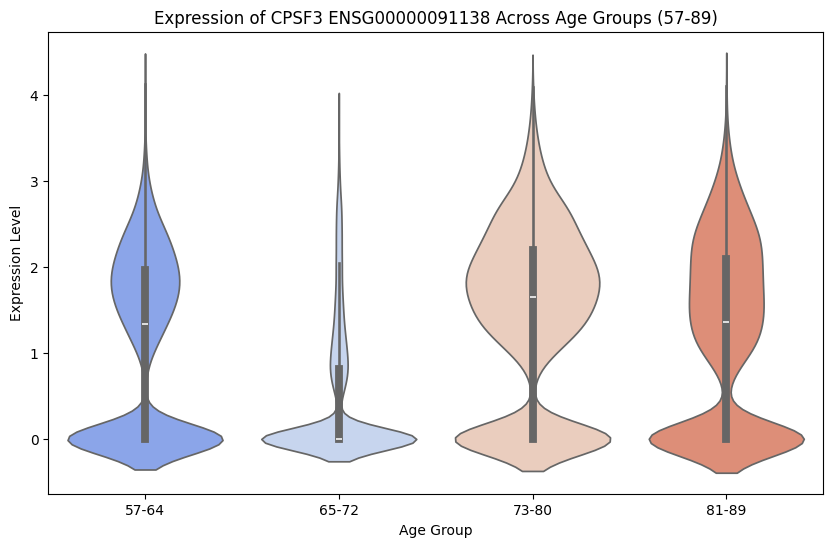

<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


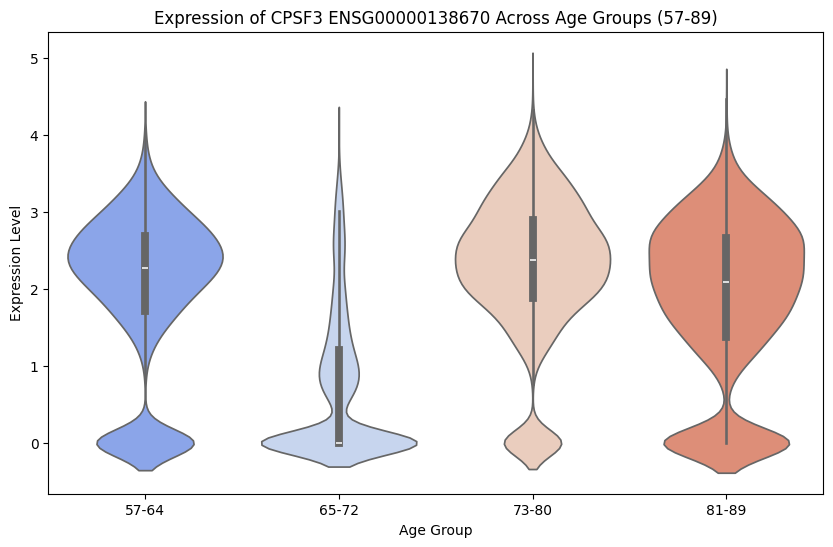

<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


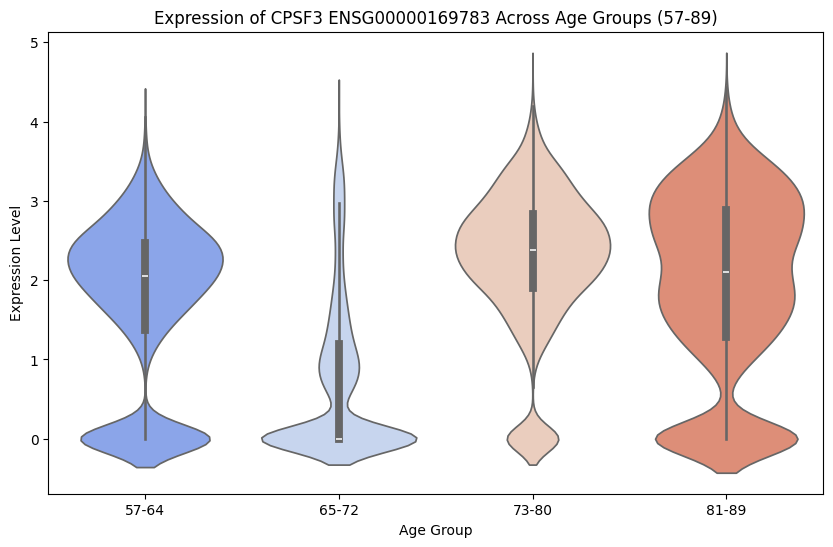

<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


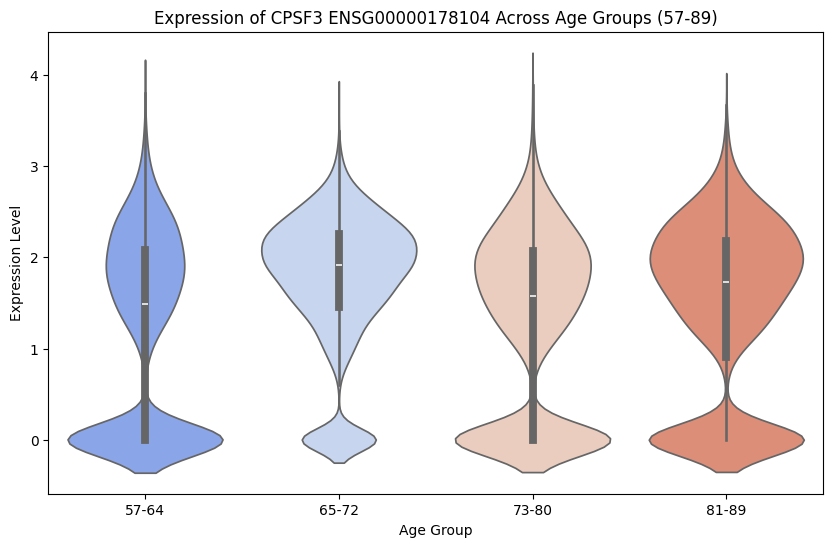

<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


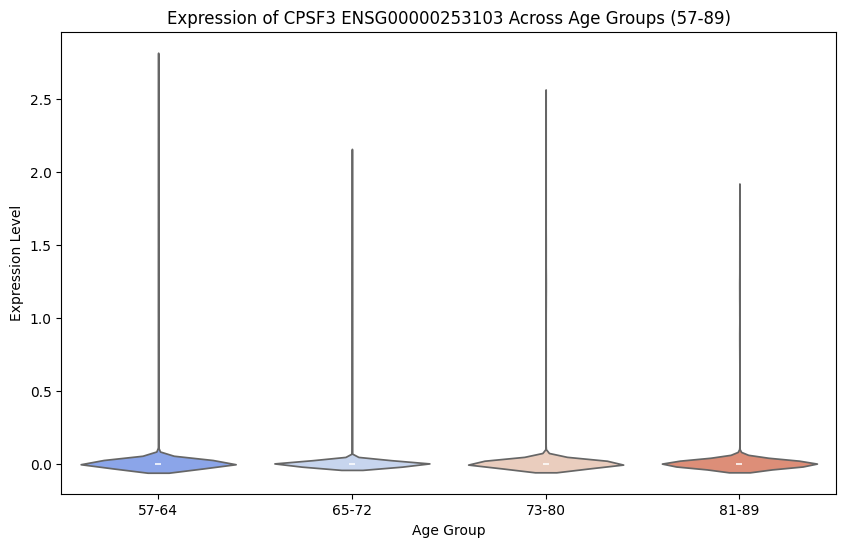

<ipython-input-32-0027907dbd2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


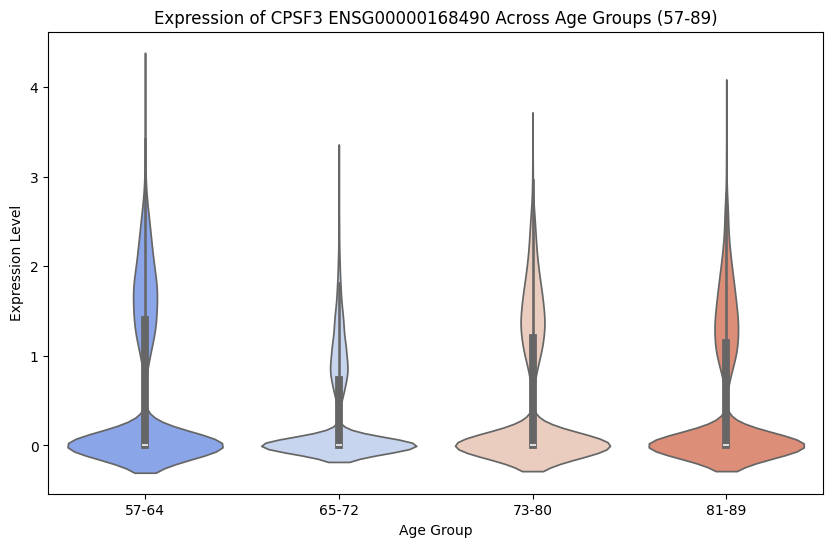

In [32]:
adata.obs['numeric_age'] = adata.obs['development_stage'].str.extract(r'(\d+)').astype(float)

# Step 2: Filter subjects based on age range (57 to 89) using the extracted `numeric_age`
adata_age_filtered = adata[adata.obs['numeric_age'].between(57, 89), :]

# Confirm the filtered dataset has the expected age range
print("Filtered AnnData object with age range 57-89:")
print(adata_age_filtered)
# Step 3: Choose genes of interest and prepare for plotting
# We will use the previously defined `matched_ids` to filter specific genes
adata_age_filtered_genes = adata_age_filtered[:, adata_age_filtered.var_names.isin(matched_ids)]

# Step 4: Create age group categories (e.g., 57-64, 65-72, 73-80, 81-89) using `numeric_age`
adata_age_filtered.obs['age_group'] = pd.cut(adata_age_filtered.obs['numeric_age'],
                                             bins=[56, 64, 72, 80, 89],
                                             labels=["57-64", "65-72", "73-80", "81-89"])

# Step 5: Visualize gene expression across different age groups for each gene of interest
for gene_id in matched_ids:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x='age_group',
        y=adata_age_filtered_genes[:, gene_id].X.toarray().flatten(),
        data=adata_age_filtered.obs,
        palette="coolwarm"
    )
    plt.title(f'Expression of {gene_name} {gene_id} Across Age Groups (57-89)')
    plt.xlabel('Age Group')
    plt.ylabel('Expression Level')
    plt.show()

Filtered AnnData object with age range 57-89:
View of AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'numeric_age'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


<ipython-input-33-342ce95fffee>:27: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_age_filtered.obs['age_group'] = pd.cut(adata_age_filtered.obs['numeric_age'],
<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


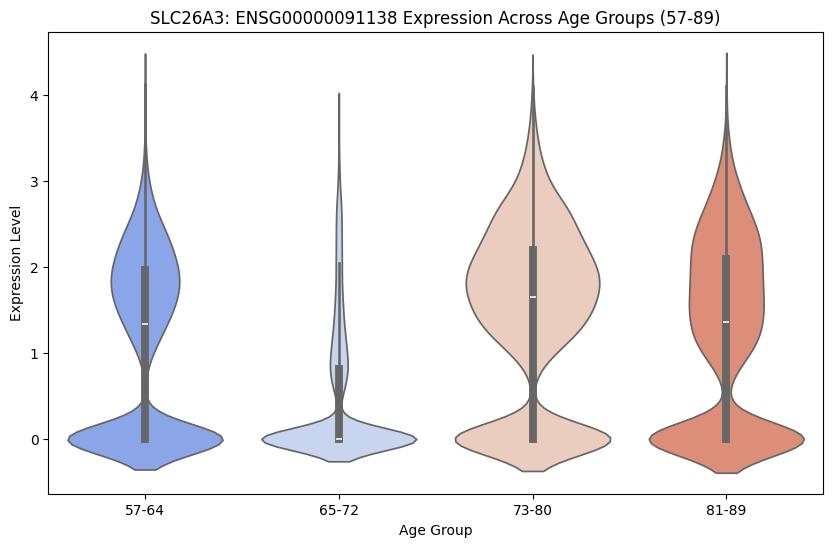

<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


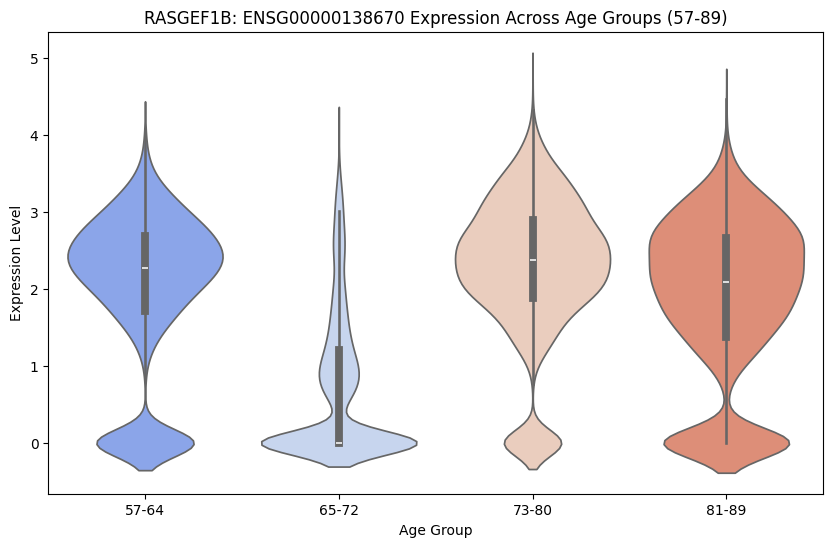

<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


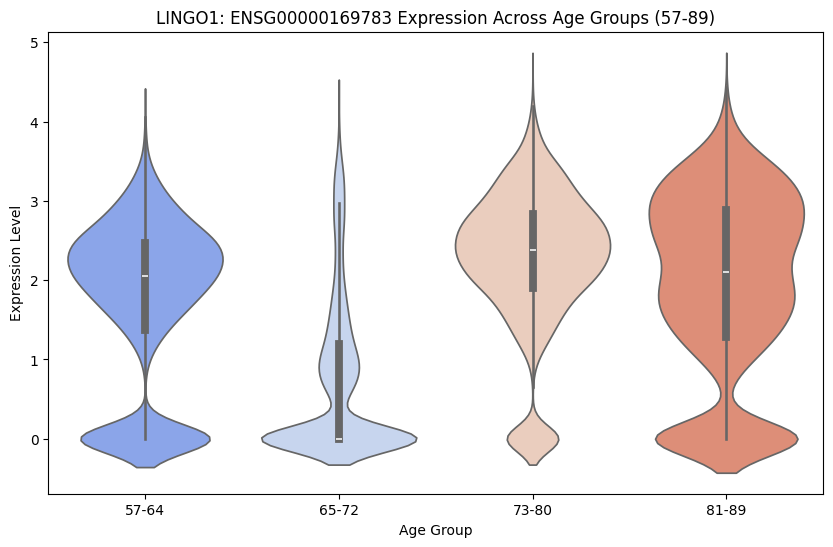

<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


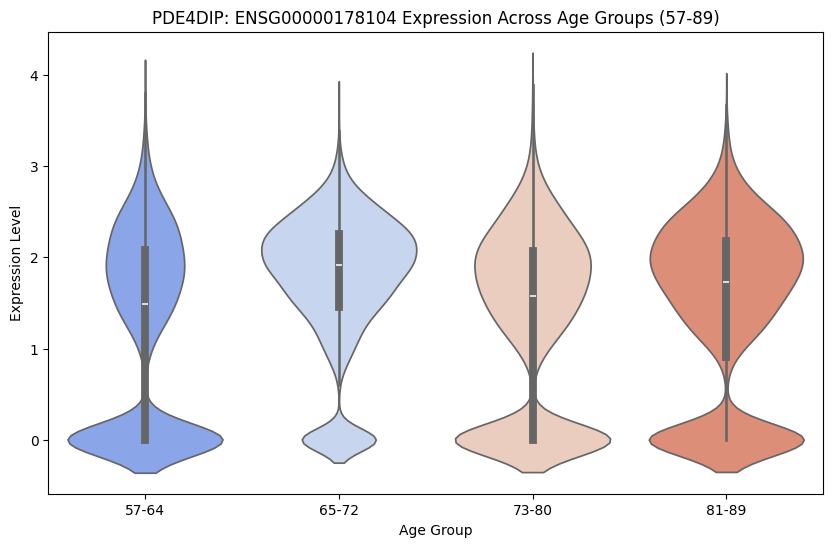

<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


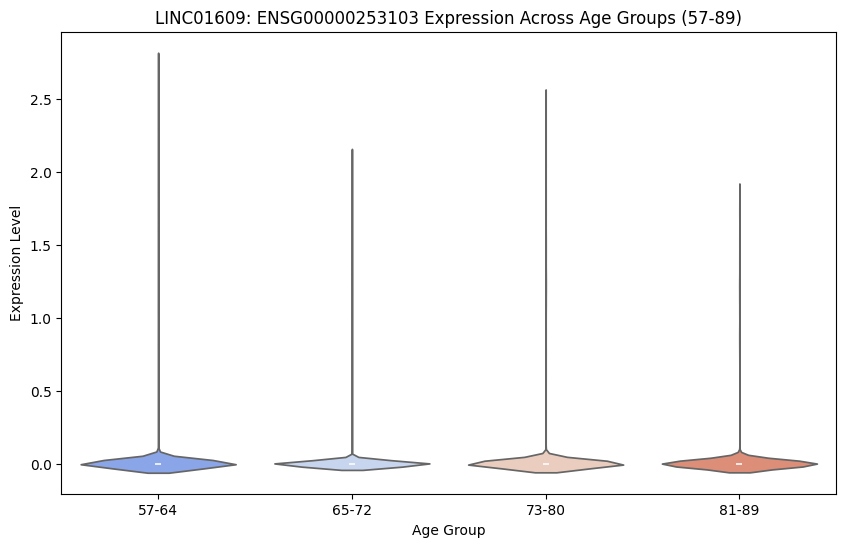

<ipython-input-33-342ce95fffee>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


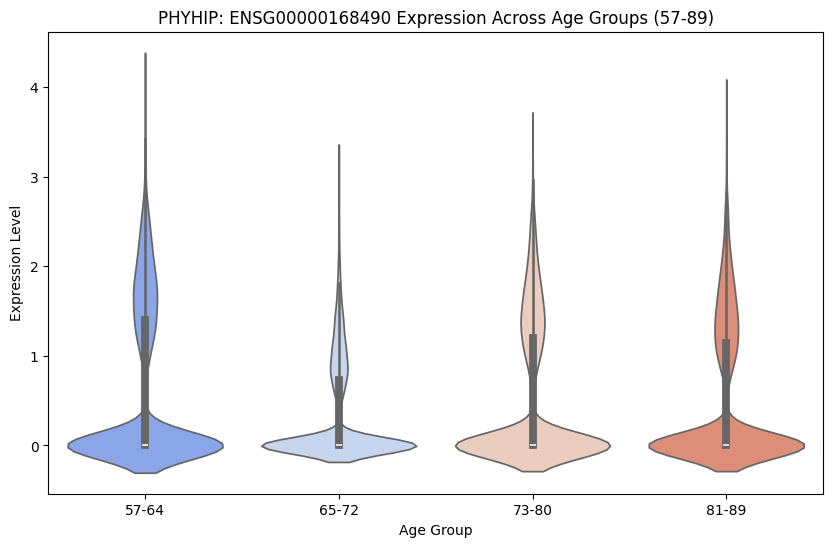

In [33]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Using the `matched_genes` dictionary as given, e.g.:
# matched_genes = {"SLC26A3": "ENSG00000091138", "RASGEF1B": "ENSG00000138670", ...}
# We will invert it to map Ensembl IDs to gene names for easier access
gene_id_to_name = {ensembl_id: gene_name for gene_name, ensembl_id in matched_genes.items()}

# Step 1: Extract numeric ages from `development_stage` column using regex
adata.obs['numeric_age'] = adata.obs['development_stage'].str.extract(r'(\d+)').astype(float)

# Step 2: Filter subjects based on age range (57 to 89) using the extracted `numeric_age`
adata_age_filtered = adata[adata.obs['numeric_age'].between(57, 89), :]

# Confirm the filtered dataset has the expected age range
print("Filtered AnnData object with age range 57-89:")
print(adata_age_filtered)

# Step 3: Choose genes of interest and prepare for plotting
# We will use the previously defined `matched_ids` to filter specific genes
adata_age_filtered_genes = adata_age_filtered[:, adata_age_filtered.var_names.isin(matched_ids)]

# Step 4: Create age group categories (e.g., 57-64, 65-72, 73-80, 81-89) using `numeric_age`
adata_age_filtered.obs['age_group'] = pd.cut(adata_age_filtered.obs['numeric_age'],
                                             bins=[56, 64, 72, 80, 89],
                                             labels=["57-64", "65-72", "73-80", "81-89"])

# Step 5: Visualize gene expression across different age groups for each gene of interest
for gene_id in matched_ids:
    gene_name = gene_id_to_name.get(gene_id, "Unknown")  # Get gene name from mapping
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x='age_group',
        y=adata_age_filtered_genes[:, gene_id].X.toarray().flatten(),
        data=adata_age_filtered.obs,
        palette="coolwarm"
    )
    plt.title(f'{gene_name}: {gene_id} Expression Across Age Groups (57-89)')
    plt.xlabel('Age Group')
    plt.ylabel('Expression Level')
    plt.show()

In [35]:
# Filter adata to include only male and female subjects
adata_gender_filtered = adata[adata.obs['sex'].isin(['male', 'female'])]

# Generate violin plots for each gene of interest
for gene_name, ensembl_id in genes_of_interest.items():
    if ensembl_id in adata.var_names:
        plt.figure(figsize=(8, 6))
        sns.violinplot(
            data=adata_gender_filtered.to_df(),
            x=adata_gender_filtered.obs['sex'],
            y=adata_gender_filtered[:, ensembl_id].X.toarray().flatten(),
            palette={"male": "skyblue", "female": "lightcoral"}
        )
        plt.title(f"{gene_name}: {ensembl_id} Expression in Male vs Female")
        plt.xlabel("Gender")
        plt.ylabel("Expression Level")
        plt.show()
    else:
        print(f"Gene {gene_name} with Ensembl ID {ensembl_id} not found in adata.var_names.")

AttributeError: 'list' object has no attribute 'items'

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


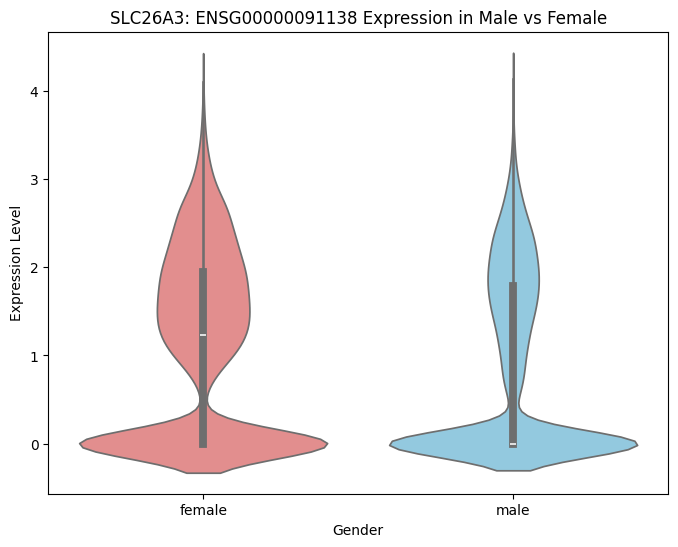

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


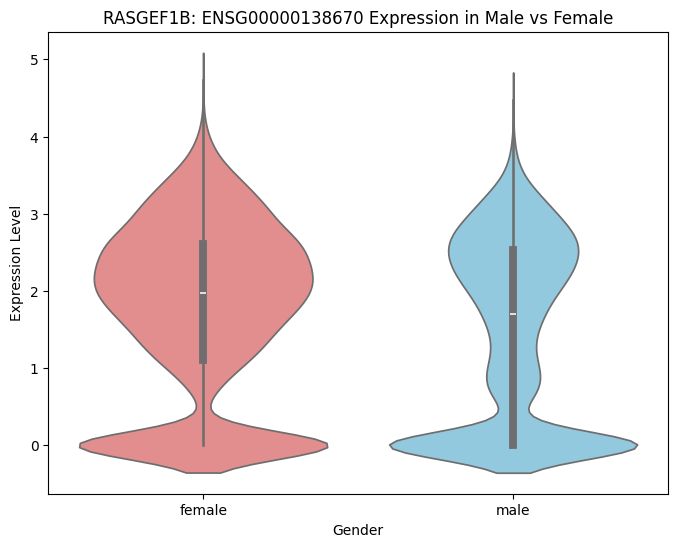

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


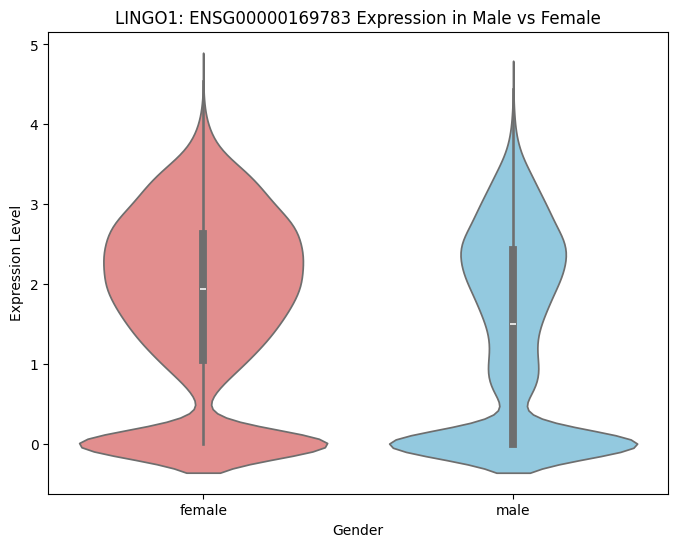

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


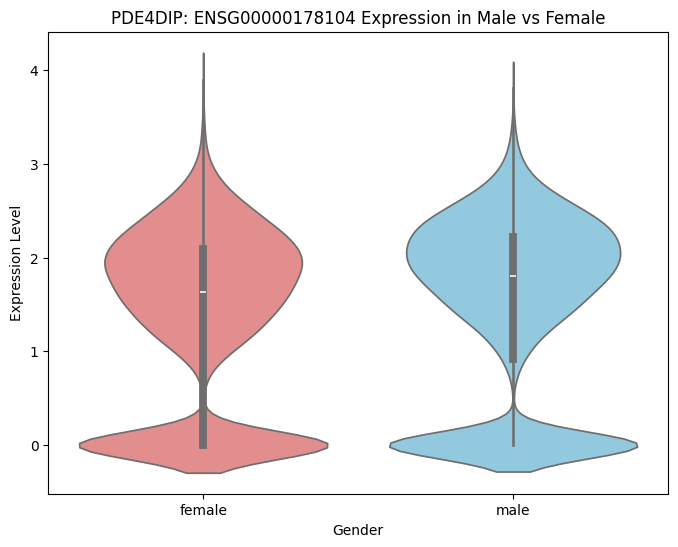

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


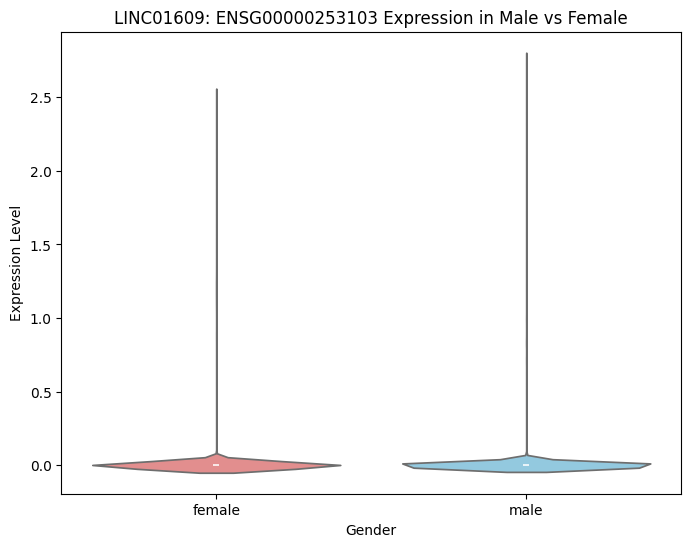

<ipython-input-36-7c592b0f1804>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


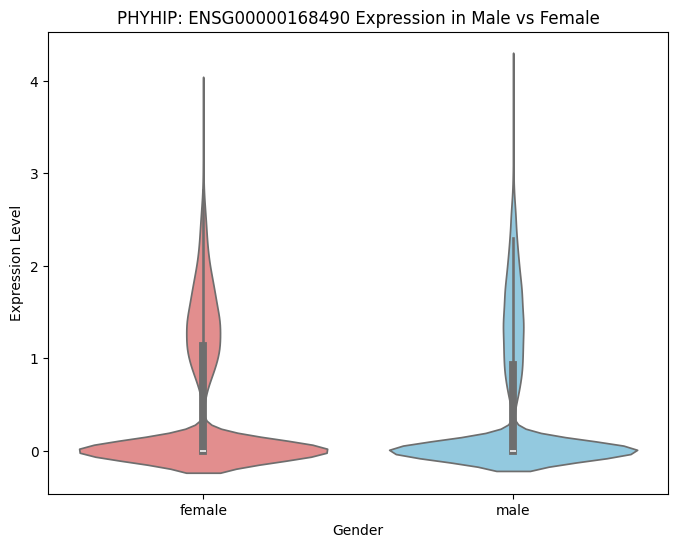

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the genes of interest with their Ensembl IDs
genes_of_interest = {
    "SLC26A3": "ENSG00000091138",
    "RASGEF1B": "ENSG00000138670",
    "LINGO1": "ENSG00000169783",
    "PDE4DIP": "ENSG00000178104",
    "LINC01609": "ENSG00000253103",
    "PHYHIP": "ENSG00000168490"
}

# Filter adata to include only male and female subjects
adata_gender_filtered = adata[adata.obs['sex'].isin(['male', 'female'])]

# Generate violin plots for each gene of interest
for gene_name, ensembl_id in genes_of_interest.items():
    if ensembl_id in adata.var_names:
        plt.figure(figsize=(8, 6))
        sns.violinplot(
            data=adata_gender_filtered.to_df(),
            x=adata_gender_filtered.obs['sex'],
            y=adata_gender_filtered[:, ensembl_id].X.toarray().flatten(),
            palette={"male": "skyblue", "female": "lightcoral"}
        )
        plt.title(f"{gene_name}: {ensembl_id} Expression in Male vs Female")
        plt.xlabel("Gender")
        plt.ylabel("Expression Level")
        plt.show()
    else:
        print(f"Gene {gene_name} with Ensembl ID {ensembl_id} not found in adata.var_names.")